# Mac Mobile

This is where we will conduct the machine learning experimentation to develop and train an accurate model for classifying when users are standing, sitting, etc.

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

def create_training_set(root,files):
  df = pd.read_csv(root+files[0])
  for i in range(1,len(files)):
    df = df.append(pd.read_csv(root+files[i]))
  return df

root = "https://raw.githubusercontent.com/pgunasekara/4zp6/master/machine_learning/training_sets/tagged_sets/"
start_accel_files_list = ["round-1/start/accel/cesar-test1-accel-start.csv",
                          "round-1/start/accel/berto-test1-accel-start.csv",
                          "round-1/start/accel/rebecca-test1-accel-start-out.csv",
                          "round-2/start/accel/new-berto-test-1-accel-start.csv",
                          "round-2/start/accel/new-berto-test-2-accel-start.csv",
                          "round-2/start/accel/new-berto-test-3-accel-start.csv",
                          "round-2/start/accel/new-berto-test-4-accel-start.csv",
                          "round-2/start/accel/new-pasi-test-5-accel-start.csv",
                          "round-2/start/accel/new-pasi-test-6-accel-start.csv",
                          "round-2/start/accel/new-berto-test-7-accel-start.csv",
                          "round-2/start/accel/new-pasi-test-8-accel-start.csv",
                          "round-2/start/accel/new-berto-test-9-accel-start.csv",
                          "round-2/start/accel/new-pasi-test-10-accel-start.csv",
                         ]
start_gyro_files_list = ["round-1/start/gyro/cesar-test1-gyro-start.csv",
                         "round-1/start/gyro/berto-test1-gyro-start.csv",
                         "round-1/start/gyro/rebecca-test1-gyro-start-out.csv",
                         "round-2/start/gyro/new-berto-test-1-gyro-start.csv",
                         "round-2/start/gyro/new-berto-test-2-gyro-start.csv",
                         "round-2/start/gyro/new-berto-test-3-gyro-start.csv",
                         "round-2/start/gyro/new-berto-test-4-gyro-start.csv",
                         "round-2/start/gyro/new-pasi-test-5-gyro-start.csv",
                         "round-2/start/gyro/new-pasi-test-6-gyro-start.csv",
                         "round-2/start/gyro/new-berto-test-7-gyro-start.csv",
                         "round-2/start/gyro/new-pasi-test-8-gyro-start.csv",
                         "round-2/start/gyro/new-berto-test-9-gyro-start.csv",
                         "round-2/start/gyro/new-pasi-test-10-gyro-start.csv",
                        ]
complete_accel_files_list = ["round-1/complete/accel/cesar-test1-accel-complete.csv",
                             "round-1/complete/accel/berto-test1-accel-complete.csv",
                             "round-1/complete/accel/rebecca-test1-accel-complete.csv",
                             "round-2/complete/accel/new-berto-test-1-accel-complete.csv",
                             "round-2/complete/accel/new-berto-test-2-accel-complete.csv",
                             "round-2/complete/accel/new-berto-test-3-accel-complete.csv",
                             "round-2/complete/accel/new-berto-test-4-accel-complete.csv",
                             "round-2/complete/accel/new-pasi-test-5-accel-complete.csv",
                             "round-2/complete/accel/new-pasi-test-6-accel-complete.csv",
                             "round-2/complete/accel/new-berto-test-7-accel-complete.csv",
                             "round-2/complete/accel/new-pasi-test-8-accel-complete.csv",
                             "round-2/complete/accel/new-berto-test-9-accel-complete.csv",
                             "round-2/complete/accel/new-pasi-test-10-accel-complete.csv",
                            ]
complete_gyro_files_list = ["round-1/complete/gyro/cesar-test1-gyro-complete.csv",
                            "round-1/complete/gyro/berto-test1-gyro-complete.csv",
                            "round-1/complete/gyro/rebecca-test1-gyro-complete-out.csv",
                            "round-2/complete/gyro/new-berto-test-1-gyro-complete.csv",
                            "round-2/complete/gyro/new-berto-test-2-gyro-complete.csv",
                            "round-2/complete/gyro/new-berto-test-3-gyro-complete.csv",
                            "round-2/complete/gyro/new-berto-test-4-gyro-complete.csv",
                            "round-2/complete/gyro/new-pasi-test-5-gyro-complete.csv",
                            "round-2/complete/gyro/new-pasi-test-6-gyro-complete.csv",
                            "round-2/complete/gyro/new-berto-test-7-gyro-complete.csv",
                            "round-2/complete/gyro/new-pasi-test-8-gyro-complete.csv",
                            "round-2/complete/gyro/new-berto-test-9-gyro-complete.csv",
                            "round-2/complete/gyro/new-pasi-test-10-gyro-complete.csv",
                           ]


#Load accelerometer data
display("Accelerometer data")
accelerometer_csv = create_training_set(root,start_accel_files_list)
accelerometer_csv = accelerometer_csv.sort_values(by=['epoch (ms)'])
accel2 = preprocessing.normalize(accelerometer_csv[['x-axis (g)','y-axis (g)','z-axis (g)']])
accelerometer_data = np.concatenate((accelerometer_csv[['epoch (ms)', 'elapsed (s)', 'state']], accel2), axis=1)
accelerometer_csv = pd.DataFrame(data=accelerometer_data[0:,0:],    # values
              index=[i for i in range(1, len(accelerometer_data) + 1)],    # 1st column as index
              columns=['epoch (ms)', 'elapsed (s)', 'state', 'x-axis (g)','y-axis (g)','z-axis (g)'])
display(accelerometer_csv['epoch (ms)'].count())
display(accelerometer_csv.head(10))

#Load ambient light data
#display("Light data")
#ambient_light_csv = pd.read_csv("/content/drive/My Drive/macmobile_data/Sample Data_Ambient Light_2018-07-31T16-03-06.231.csv")
#display(ambient_light_csv.head(10))

#Load gyroscope data
display("Gyroscope data")
gyroscope_csv = create_training_set(root,start_gyro_files_list)
gyroscope_csv = gyroscope_csv.sort_values(by=['epoch (ms)'])
gyro2 = preprocessing.normalize(gyroscope_csv[['x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)']])
gyroscope_data = np.concatenate((gyroscope_csv[['epoch (ms)', 'elapsed (s)', 'state']], gyro2), axis=1)
gyroscope_csv = pd.DataFrame(data=gyroscope_data[0:,0:],    # values
              index=[i for i in range(1, len(gyroscope_data) + 1)],    # 1st column as index
              columns=['epoch (ms)', 'elapsed (s)', 'state', 'x-axis (deg/s)','y-axis (deg/s)','z-axis (deg/s)'])
display(gyroscope_csv['epoch (ms)'].count())
display(gyroscope_csv.head(10))
#accelerometer_csv['x-axis (°/s)'] = preprocessing.normalize(accelerometer_csv['x-axis (°/s)'])
#accelerometer_csv['y-axis (°/s)'] = preprocessing.normalize(accelerometer_csv['y-axis (°/s)'])
#accelerometer_csv['z-axis (°/s)'] = preprocessing.normalize(accelerometer_csv['z-axis (°/s)'])

#Load magnetometer data
#display("Magnetometer data")
#magnetometer_csv = pd.read_csv("/content/drive/My Drive/macmobile_data/Sample Data_Magnetometer_2018-07-31T16-03-06.231.csv")
#display(magnetometer_csv.head(10))

#Load pressure data
#display("Pressure data")
#pressure_csv = pd.read_csv("/content/drive/My Drive/macmobile_data/Sample Data_Pressure_2018-07-31T16-03-06.231.csv")
#display(pressure_csv.head(10))

#Load temperature data
#display("Temperature data")
#temperature_csv = pd.read_csv("/content/drive/My Drive/macmobile_data/Sample Data_Temperature_2018-07-31T16-03-06.231.csv")
#display(temperature_csv.head(10))

'Accelerometer data'

101013

,epoch (ms),elapsed (s),state,x-axis (g),y-axis (g),z-axis (g)
1,1542812667573,0,standing,0.183454,-0.967305,0.175116
2,1542812667573,0,standing,0.177929,-0.968383,0.174861
3,1542812667573,0,standing,0.17455,-0.969053,0.17455
4,1542812667685,0.112,standing,0.159751,-0.972935,0.166966
5,1542812667685,0.112,standing,0.174735,-0.969169,0.173719
6,1542812667685,0.112,standing,0.171159,-0.969901,0.173197
7,1542812667809,0.236,standing,0.157348,-0.973911,0.163518
8,1542812667809,0.236,standing,0.153238,-0.975054,0.160585
9,1542812667809,0.236,standing,0.160196,-0.973825,0.16125
10,1542812667933,0.36,standing,0.16245,-0.970479,0.178273


'Gyroscope data'

101046

,epoch (ms),elapsed (s),state,x-axis (deg/s),y-axis (deg/s),z-axis (deg/s)
1,1542812667449,0,standing,0.678844,0.61096,-0.407307
2,1542812667449,0,standing,0.90974,0.400548,-0.10924
3,1542812667449,0,standing,0.284108,0.899676,-0.33146
4,1542812667574,0.125,standing,-0.1693,0.902932,0.395033
5,1542812667574,0.125,standing,-0.247827,0.955615,0.159317
6,1542812667574,0.125,standing,-0.303668,0.911213,0.278345
7,1542812667686,0.237,standing,0.241034,-0.589146,-0.771239
8,1542812667686,0.237,standing,0.27307,-0.86494,-0.421084
9,1542812667686,0.237,standing,0.190886,-0.745737,-0.638309
10,1542812667810,0.361,standing,-0.162459,-0.985228,-0.0541529


In [0]:
import sys

def windowify(size, step, dataset, stats_func):
  # Get the first timestamp
  start = dataset['epoch (ms)'].iloc[0]
  
  #index of the starting timestamp
  start_index = 0
  
  #index of the beginning of the next step
  step_index = 0
  
  #current index
  i = 0
  
  #stores all the windows
  windows = []
  
  #length of the dataset
  dataset_length = dataset['epoch (ms)'].count()
  
  while i < dataset_length:
    optimal_step = start + step
    min_step_distance = sys.maxsize
    #while we haven't reached the end of the dataset and we still have no completed an entire window
    while i < dataset_length and start + size >= dataset['epoch (ms)'].iloc[i]:
      
      #Find the closest entry to where the step _would_ be
      if abs(optimal_step - dataset['epoch (ms)'].iloc[i]) < min_step_distance:
        step_index = i
        min_step_distance = abs(optimal_step - dataset['epoch (ms)'].iloc[i])
      i += 1
    
    #we have a window of duration size that starts at index start_index and ends at i
    window_frame = dataset[start_index:i]
    
    #calculate some information about the window and store it
    windows.append(stats_func(window_frame))
    
    if i == dataset_length:
      break
      
    if dataset['epoch (ms)'].iloc[i] - dataset['epoch (ms)'].iloc[i-1] > size * 2:
      step_index = i + 1

    #start the next window
    i = step_index
    start_index = step_index
    start = dataset['epoch (ms)'].iloc[i]
    
  return windows

def is_contained_by(absorbing_row,merging_row):
  return absorbing_row['epoch_start'] < merging_row['epoch_start'] and \
    absorbing_row['epoch_end'] > merging_row['epoch_end']

def get_merge_distance(absorbing_row,merging_row):
  start_dist = abs(absorbing_row['epoch_start'] - merging_row['epoch_start'])
  end_dist = abs(absorbing_row['epoch_end'] - merging_row['epoch_end'])
  return start_dist + end_dist
  
def merge_rows(absorbing_row,merging_row):
  return absorbing_row[['action','epoch_start','epoch_length','epoch_end']].astype('int64').append(merging_row[4:]).to_dict()

def build_mergeable_dataframes(df1,df2):
  res = []
  df1_ptr,df2_ptr = 0,0
  while df2_ptr < df2['epoch_start'].count():
    row_to_merge = df2.iloc[df2_ptr]
    if is_contained_by(df1.iloc[df1_ptr],row_to_merge):
      res.append(merge_rows(df1.iloc[df1_ptr],row_to_merge))
    else:
      #display(df1_ptr,df2_ptr,df1['epoch_start'].count())
      distToPrev = get_merge_distance(df1.iloc[df1_ptr],row_to_merge)
      nxt_ptr = df1_ptr + 1 if df1_ptr + 1 < df1['epoch_start'].count() else df1_ptr
      distToNext = get_merge_distance(df1.iloc[nxt_ptr],row_to_merge)
      
      if distToPrev < distToNext:
        res.append(merge_rows(df1.iloc[df1_ptr],row_to_merge))
      else:
        res.append(merge_rows(df1.iloc[nxt_ptr],row_to_merge))
        df1_ptr=nxt_ptr
    df2_ptr += 1
  return res
      
    

User actions are defined as follows:


*   0: Sitting
*   1: Lying in bed
*   2: Walking
*   3: Standing



In [0]:
from random import randint

def accelerometer_stats(window_frame):
  return {
      "accel_x_avg": window_frame["x-axis (g)"].mean(),
      "accel_x_max": window_frame["x-axis (g)"].max(),
      "accel_x_min": window_frame["x-axis (g)"].min(),
      "accel_x_var": window_frame["x-axis (g)"].var(),
      
      "accel_y_avg": window_frame["y-axis (g)"].mean(),
      "accel_y_max": window_frame["y-axis (g)"].max(),
      "accel_y_min": window_frame["y-axis (g)"].min(),
      "accel_y_var": window_frame["y-axis (g)"].var(),
      
      "accel_z_avg": window_frame["z-axis (g)"].mean(),
      "accel_z_max": window_frame["z-axis (g)"].max(),
      "accel_z_min": window_frame["z-axis (g)"].min(),
      "accel_z_var": window_frame["z-axis (g)"].var(),
      
      "epoch_start": window_frame["epoch (ms)"].min(),
      "epoch_end": window_frame["epoch (ms)"].max(),
      "epoch_length": window_frame["epoch (ms)"].max() - window_frame["epoch (ms)"].min(),
      
      "action": window_frame['state'].apply(state_to_num).value_counts().idxmax()
  }

def gyroscope_stats(window_frame):
  return {
      "gyro_x_avg": window_frame["x-axis (deg/s)"].mean(),
      "gyro_x_max": window_frame["x-axis (deg/s)"].max(),
      "gyro_x_min": window_frame["x-axis (deg/s)"].min(),
      "gyro_x_var": window_frame["x-axis (deg/s)"].var(),
      
      "gyro_y_avg": window_frame["y-axis (deg/s)"].mean(),
      "gyro_y_max": window_frame["y-axis (deg/s)"].max(),
      "gyro_y_min": window_frame["y-axis (deg/s)"].min(),
      "gyro_y_var": window_frame["y-axis (deg/s)"].var(),
      
      "gyro_z_avg": window_frame["z-axis (deg/s)"].mean(),
      "gyro_z_max": window_frame["z-axis (deg/s)"].max(),
      "gyro_z_min": window_frame["z-axis (deg/s)"].min(),
      "gyro_z_var": window_frame["z-axis (deg/s)"].var(),
      
      "epoch_start": window_frame["epoch (ms)"].min(),
      "epoch_end": window_frame["epoch (ms)"].max(),
      "epoch_length": window_frame["epoch (ms)"].max() - window_frame["epoch (ms)"].min(),
      
      # For now we randomly assign an action the user is doing until we can capture and label our own data
      "action": window_frame["state"].apply(state_to_num).value_counts().idxmax()
  }

def state_to_num(state):
  if state == "standing":
    return 3
  if state == "sitting":
    return 0
  if state == "layingdown":
    return 1
  if state == "walking":
    return 2
  return -1

In [8]:
import time
#start_time = time.time()
accelerometer_windows = windowify(2500, 500, accelerometer_csv, accelerometer_stats)
accel_df = pd.DataFrame.from_records(accelerometer_windows)
#display(accel_df.head(10))
gyroscope_windows = windowify(2500, 500, gyroscope_csv, gyroscope_stats)
gyro_df = pd.DataFrame.from_records(gyroscope_windows)
#elapsed_time = time.time() - start_time
#display(elapsed_time)
display(gyro_df.head(10))
display(accel_df['epoch_start'].count())
display(gyro_df['epoch_start'].count())

#mergeable_series_lst = build_mergeable_dataframes(accel_df.head(10),gyro_df.head(10))
mergeable_series_lst = build_mergeable_dataframes(accel_df,gyro_df)
mergeable_df = pd.DataFrame.from_records(mergeable_series_lst)
typecast_map = {"epoch_end":"int64","epoch_start":"int64","action":"int64","epoch_length":"int64"}
for i in typecast_map.keys():
  mergeable_df[i] = mergeable_df[i].astype(typecast_map[i])
  
accel_gyro_df = pd.merge(accel_df,mergeable_df,on=['epoch_start','epoch_end','action','epoch_length'])
display(accel_gyro_df.columns)
#display(accel_gyro_df[['epoch_start','epoch_end','accel_x_avg','gyro_x_avg']])
display(accel_gyro_df.head(10))
display(accel_gyro_df['epoch_start'].count())

,action,epoch_end,epoch_length,epoch_start,gyro_x_avg,gyro_x_max,gyro_x_min,gyro_x_var,gyro_y_avg,gyro_y_max,gyro_y_min,gyro_y_var,gyro_z_avg,gyro_z_max,gyro_z_min,gyro_z_var
0,3,1542812669870,2421,1542812667449,0.046991,0.909740,-0.795273,0.109553,-0.013505,0.990044,-0.988045,0.666019,-0.001481,0.934011,-0.932445,0.238126
1,3,1542812670374,2440,1542812667934,0.027876,0.856731,-0.795273,0.109930,-0.133900,0.990044,-0.996475,0.644047,0.110174,0.934011,-0.932445,0.230810
2,3,1542812670864,2446,1542812668418,0.157066,0.856731,-0.795273,0.157062,-0.102500,0.990044,-0.996475,0.593045,-0.085799,0.829561,-0.932445,0.222799
3,3,1542812671332,2430,1542812668902,0.169985,0.842152,-0.795273,0.155904,-0.217305,0.990044,-0.996475,0.550434,0.052775,0.912871,-0.879049,0.229616
4,3,1542812671821,2431,1542812669390,0.272375,0.999055,-0.518476,0.131825,-0.171848,0.997054,-0.996475,0.547847,-0.044396,0.912871,-0.882258,0.229061
5,3,1542812672307,2437,1542812669870,0.244795,0.999055,-0.895533,0.196424,-0.280870,0.997054,-0.996475,0.423074,0.065777,0.912871,-0.882258,0.251183
6,3,1542812672784,2410,1542812670374,0.349452,0.999055,-0.895533,0.186915,-0.203455,0.997054,-0.994867,0.390266,-0.019617,0.912871,-0.893500,0.272409
7,3,1542812673271,2407,1542812670864,0.276109,0.999055,-0.895533,0.183038,-0.135762,0.997054,-0.994867,0.429126,0.156122,0.981023,-0.893500,0.283003
8,3,1542812673764,2432,1542812671332,0.224069,0.999055,-0.895533,0.179959,-0.029552,0.997054,-0.994867,0.424461,0.226581,0.988372,-0.893500,0.307638
9,3,1542812674236,2415,1542812671821,0.066767,0.870063,-0.895533,0.210639,0.053192,0.983308,-0.994867,0.443781,0.295417,0.988372,-0.893500,0.265626


6924

6924

Index(['accel_x_avg', 'accel_x_max', 'accel_x_min', 'accel_x_var',
       'accel_y_avg', 'accel_y_max', 'accel_y_min', 'accel_y_var',
       'accel_z_avg', 'accel_z_max', 'accel_z_min', 'accel_z_var', 'action',
       'epoch_end', 'epoch_length', 'epoch_start', 'gyro_x_avg', 'gyro_x_max',
       'gyro_x_min', 'gyro_x_var', 'gyro_y_avg', 'gyro_y_max', 'gyro_y_min',
       'gyro_y_var', 'gyro_z_avg', 'gyro_z_max', 'gyro_z_min', 'gyro_z_var'],
      dtype='object')

,accel_x_avg,accel_x_max,accel_x_min,accel_x_var,accel_y_avg,accel_y_max,accel_y_min,accel_y_var,accel_z_avg,accel_z_max,...,gyro_x_min,gyro_x_var,gyro_y_avg,gyro_y_max,gyro_y_min,gyro_y_var,gyro_z_avg,gyro_z_max,gyro_z_min,gyro_z_var
0,0.159138,0.234144,0.088988,0.000618,-0.969768,-0.947678,-0.979520,3.279829e-05,0.181869,0.254380,...,-0.795273,0.109553,-0.013505,0.990044,-0.988045,0.666019,-0.001481,0.934011,-0.932445,0.238126
1,0.158496,0.234144,0.088988,0.000596,-0.969421,-0.947678,-0.979520,3.113572e-05,0.184430,0.254380,...,-0.795273,0.109930,-0.133900,0.990044,-0.996475,0.644047,0.110174,0.934011,-0.932445,0.230810
2,0.153222,0.183332,0.088988,0.000327,-0.970460,-0.958764,-0.979520,1.308582e-05,0.184445,0.254380,...,-0.795273,0.157062,-0.102500,0.990044,-0.996475,0.593045,-0.085799,0.829561,-0.932445,0.222799
3,0.158417,0.183332,0.088988,0.000138,-0.969774,-0.958764,-0.976552,8.410602e-06,0.184732,0.244460,...,-0.795273,0.155904,-0.217305,0.990044,-0.996475,0.550434,0.052775,0.912871,-0.879049,0.229616
4,0.159953,0.179128,0.141078,0.000040,-0.969573,-0.960780,-0.972936,3.521381e-06,0.185100,0.211697,...,-0.518476,0.131825,-0.171848,0.997054,-0.996475,0.547847,-0.044396,0.912871,-0.882258,0.229061
5,0.161649,0.171096,0.154163,0.000014,-0.969110,-0.966819,-0.972020,1.217110e-06,0.186178,0.193310,...,-0.895533,0.196424,-0.280870,0.997054,-0.996475,0.423074,0.065777,0.912871,-0.882258,0.251183
6,0.162150,0.169527,0.154163,0.000011,-0.968791,-0.966819,-0.970933,9.797494e-07,0.187418,0.193310,...,-0.895533,0.186915,-0.203455,0.997054,-0.994867,0.390266,-0.019617,0.912871,-0.893500,0.272409
7,0.163421,0.172314,0.154163,0.000013,-0.968319,-0.965468,-0.970775,1.061150e-06,0.188745,0.196191,...,-0.895533,0.183038,-0.135762,0.997054,-0.994867,0.429126,0.156122,0.981023,-0.893500,0.283003
8,0.163382,0.172314,0.151148,0.000017,-0.968068,-0.965468,-0.970636,9.804403e-07,0.190062,0.196833,...,-0.895533,0.179959,-0.029552,0.997054,-0.994867,0.424461,0.226581,0.988372,-0.893500,0.307638
9,0.161554,0.172314,0.147391,0.000040,-0.968478,-0.965468,-0.971515,2.257472e-06,0.189468,0.196833,...,-0.895533,0.210639,0.053192,0.983308,-0.994867,0.443781,0.295417,0.988372,-0.893500,0.265626


6924

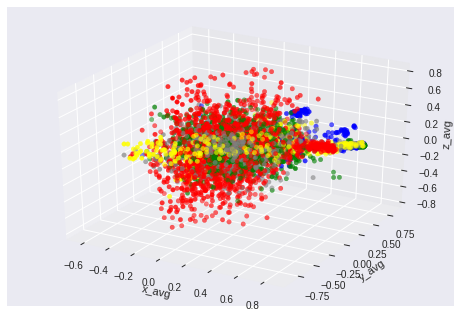

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['red','green','blue','yellow', 'grey']
color_labels = ['sitting', 'lying in bed', 'walking', 'standing', 'unknown']

ax.scatter(xs=accel_gyro_df['gyro_x_avg'],
           ys=accel_gyro_df['gyro_y_avg'],
           zs=accel_gyro_df['gyro_z_avg'],
           c=accel_gyro_df['action'],
           cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('x_avg')
ax.set_ylabel('y_avg')
ax.set_zlabel('z_avg')

plt.show()

User actions are defined as follows:


*   0: Sitting
*   1: Lying in bed
*   2: Walking
*   3: Standing

(6924, 24)

(6924, 3)

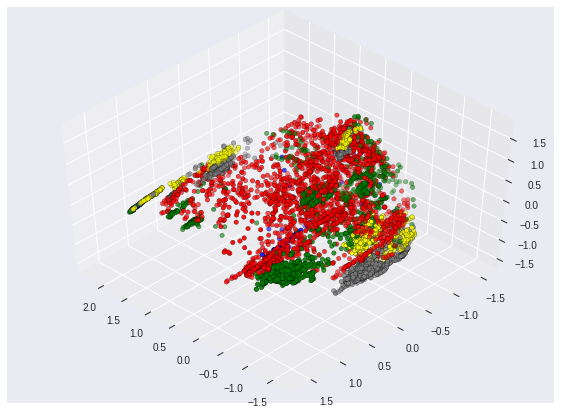

In [23]:
from sklearn import decomposition

X = accel_gyro_df.drop(['action', 'epoch_length', 'epoch_end', 'epoch_start'], axis=1)
y = accel_gyro_df.action.values

display(X.shape)
fig = plt.figure()
plt.clf()
#ax = fig.add_subplot(111)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
#pca = decomposition.PCA(n_components='mle', svd_solver='full')
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
display(X.shape)

# for name, label in [('Sitting', 0), ('Lying in bed', 1), ('Walking', 2), ('Standing', 3)]:
#     ax.text3D(X[y == label, 0].mean(),
#               X[y == label, 1].mean() + 1.5,
#               X[y == label, 2].mean(),
#               X[y == label, 3].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y, cmap=matplotlib.colors.ListedColormap(colors),
           edgecolor='k')

#ax.xaxis.set_ticklabels([])
#ax.yaxis.set_ticklabels([])
#ax.w_zaxis.set_ticklabels([])

plt.show()

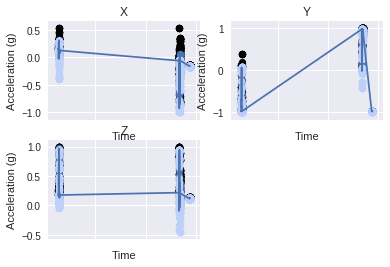

In [0]:
fig = plt.figure()
ax = fig.add_subplot(221)
ay = fig.add_subplot(222)
az = fig.add_subplot(223)

ax.scatter(accel_gyro_df['epoch_start'], accel_gyro_df['accel_x_max'],c="#000000")
ax.scatter(accel_gyro_df['epoch_start'], accel_gyro_df['accel_x_avg'])
ax.plot(accel_gyro_df['epoch_start'], accel_gyro_df['accel_x_avg'])
ax.scatter(accel_gyro_df['epoch_start'], accel_gyro_df['accel_x_min'],c="#bdd0f9")
ax.set_title('X')
ax.set_xticklabels([])
ax.set_ylabel('Acceleration (g)')
ax.set_xlabel('Time')

ay.scatter(accel_gyro_df['epoch_start'], accel_gyro_df['accel_y_max'],c="#000000")
ay.scatter(accel_gyro_df['epoch_start'], accel_gyro_df['accel_y_avg'])
ay.plot(accel_gyro_df['epoch_start'], accel_gyro_df['accel_y_avg'])
ay.scatter(accel_gyro_df['epoch_start'], accel_gyro_df['accel_y_min'],c="#bdd0f9")
ay.set_title('Y')
ay.set_xticklabels([])
ay.set_ylabel('Acceleration (g)')
ay.set_xlabel('Time')

az.scatter(accel_gyro_df['epoch_start'], accel_gyro_df['accel_z_max'],c="#000000")
az.scatter(accel_gyro_df['epoch_start'], accel_gyro_df['accel_z_avg'])
az.plot(accel_gyro_df['epoch_start'], accel_gyro_df['accel_z_avg'])
az.scatter(accel_gyro_df['epoch_start'], accel_gyro_df['accel_z_min'],c="#bdd0f9")
az.set_title('Z')
az.set_xticklabels([])
az.set_ylabel('Acceleration (g)')
az.set_xlabel('Time')

plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X = accel_gyro_df.drop(['action', 'epoch_length', 'epoch_end', 'epoch_start'], axis=1)
y = accel_gyro_df.action
#X = np.delete(X, [1], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

display(knn.score(X_test, y_test))

predictions = knn.predict(X_test)

display(confusion_matrix(y_test,predictions))


display(classification_report(y_test,predictions))




0.9422299248989023

array([[619,  10,   0,   0,   0],
       [ 24, 439,   2,   4,   1],
       [  6,   8,  44,   0,   1],
       [  1,   0,   1, 179,   3],
       [  0,   9,   1,  29, 350]])

'              precision    recall  f1-score   support\n\n          -1       0.95      0.98      0.97       629\n           0       0.94      0.93      0.94       470\n           1       0.92      0.75      0.82        59\n           2       0.84      0.97      0.90       184\n           3       0.99      0.90      0.94       389\n\n   micro avg       0.94      0.94      0.94      1731\n   macro avg       0.93      0.91      0.91      1731\nweighted avg       0.94      0.94      0.94      1731\n'

In [25]:
from sklearn import svm

#X = accel_gyro_df.drop(['action', 'epoch_length', 'epoch_end', 'epoch_start'], axis=1)
#y = accel_gyro_df.action
#X = np.delete(X, [1], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Uses the "one vs one" multiclassification approach
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, y)

display(clf.score(X_test, y_test))

predictions = clf.predict(X_test)

display(confusion_matrix(y_test,predictions))

display(classification_report(y_test,predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8734835355285961

array([[588,  39,   0,   2,   0],
       [ 69, 392,   0,   9,   0],
       [ 14,  16,  29,   0,   0],
       [  4,   3,   0, 166,  11],
       [  3,  16,   0,  33, 337]])

'              precision    recall  f1-score   support\n\n          -1       0.87      0.93      0.90       629\n           0       0.84      0.83      0.84       470\n           1       1.00      0.49      0.66        59\n           2       0.79      0.90      0.84       184\n           3       0.97      0.87      0.91       389\n\n   micro avg       0.87      0.87      0.87      1731\n   macro avg       0.89      0.81      0.83      1731\nweighted avg       0.88      0.87      0.87      1731\n'

In [26]:
from sklearn.linear_model import Perceptron

#X = accel_gyro_df.drop(['action', 'epoch_length', 'epoch_end', 'epoch_start'], axis=1)
#y = accel_gyro_df.action

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = Perceptron(tol=1e-3, random_state=0)

clf.fit(X, y)

display(clf.score(X_test, y_test))

predictions = clf.predict(X_test)

display(confusion_matrix(y_test,predictions))

display(classification_report(y_test,predictions))

0.6198729058347776

array([[508,  41,   6,   6,  68],
       [107, 125,  30,   3, 205],
       [ 13,   1,  45,   0,   0],
       [ 34,  10,  13,  46,  81],
       [  6,   4,  21,   9, 349]])

'              precision    recall  f1-score   support\n\n          -1       0.76      0.81      0.78       629\n           0       0.69      0.27      0.38       470\n           1       0.39      0.76      0.52        59\n           2       0.72      0.25      0.37       184\n           3       0.50      0.90      0.64       389\n\n   micro avg       0.62      0.62      0.62      1731\n   macro avg       0.61      0.60      0.54      1731\nweighted avg       0.67      0.62      0.59      1731\n'

In [27]:
from sklearn.neural_network import MLPClassifier

#X = accel_gyro_df.drop(['action', 'epoch_length', 'epoch_end', 'epoch_start'], axis=1)
#y = accel_gyro_df.action

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

clf.fit(X, y)

display(clf.score(X_test, y_test))

predictions = clf.predict(X_test)

display(confusion_matrix(y_test,predictions))

display(classification_report(y_test,predictions))

0.9283651068746389

array([[602,  27,   0,   0,   0],
       [ 29, 432,   2,   4,   3],
       [  6,  13,  39,   0,   1],
       [  1,   1,   0, 178,   4],
       [  0,   7,   2,  24, 356]])

'              precision    recall  f1-score   support\n\n          -1       0.94      0.96      0.95       629\n           0       0.90      0.92      0.91       470\n           1       0.91      0.66      0.76        59\n           2       0.86      0.97      0.91       184\n           3       0.98      0.92      0.95       389\n\n   micro avg       0.93      0.93      0.93      1731\n   macro avg       0.92      0.88      0.90      1731\nweighted avg       0.93      0.93      0.93      1731\n'